In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\a237938\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
diabetesdata = pd.read_csv('C:/Users/a237938/Desktop/programmingProjects/DiabetesPrediction/diabetes.csv')

Exploring data

In [55]:
#Column types
diabetesdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [56]:
#Checking how many records and if i have null values
diabetesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
#Checking for stats 
diabetesdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The min values have 0 and we cannot have 0 because we cannot make anything from it. so we gonna have to replace 0 with a mean of those columns

In [60]:
#check for duplicates
diabetesdata.shape

(768, 9)

In [59]:
#Dropping duplicates
diabetesdata = diabetesdata.drop_duplicates()

In [65]:
#because our min is zero, we need to replace that 0 with the mean of the affected column
diabetesdata['Glucose'] = diabetesdata['Glucose'].replace(0, diabetesdata['Glucose'].mean())
diabetesdata['BloodPressure'] = diabetesdata['BloodPressure'].replace(0, diabetesdata['BloodPressure'].mean())
diabetesdata['SkinThickness'] = diabetesdata['SkinThickness'].replace(0, diabetesdata['SkinThickness'].mean())
diabetesdata['Insulin'] = diabetesdata['Insulin'].replace(0, diabetesdata['Insulin'].mean())
diabetesdata['BMI'] = diabetesdata['BMI'].replace(0, diabetesdata['BMI'].mean())
diabetesdata['Pregnancies'] = diabetesdata['Pregnancies'].replace(0, diabetesdata['Pregnancies'].mean())

In [64]:
diabetesdata.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Visualizing the data 

Negative (0):  500
Negative (0):  268


C:\Users\a237938\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


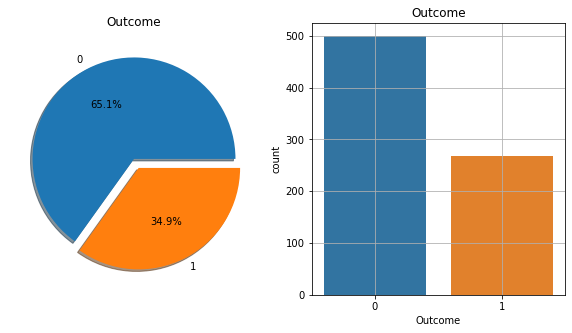

In [78]:
f, ax = plt.subplots(1,2, figsize=(10, 5))
diabetesdata['Outcome'].value_counts().plot.pie(explode= [0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome', data=diabetesdata, ax=ax[1])
ax[1].set_title('Outcome')
N, P = diabetesdata['Outcome'].value_counts()
print ('Negative (0): ',N)
print ('Negative (0): ',P)
plt.grid()
plt.show()

My data is imbalanced, 60% yes and 30 % No so its not balanced. We need to abalance the data.

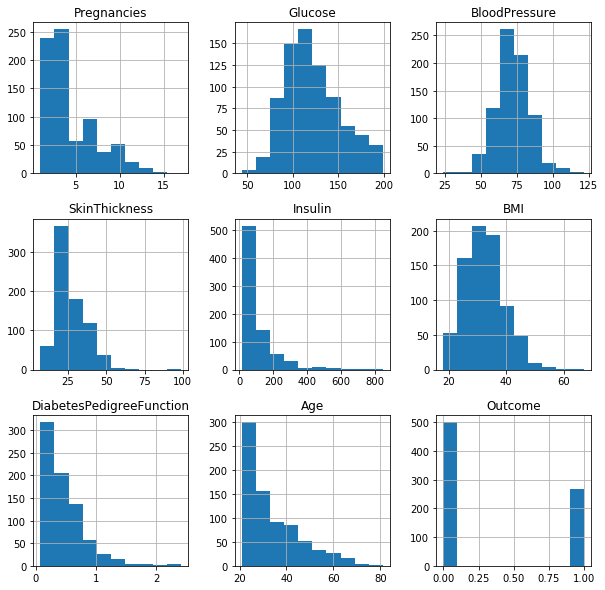

In [80]:
#Histogram for each feature in our data set
#This will show how the data is distributed
diabetesdata.hist(bins=10, figsize=(10, 10))
plt.show()

separating the data into labels we need (x and y)

In [7]:
X = diabetesdata.drop(columns='Outcome', axis=1)
Y = diabetesdata.Outcome

In [8]:
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

training the data 

In [14]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, stratify= Y, random_state=2)

In [88]:
X_train.shape, Y_train.shape

((614, 8), (614,))

In [89]:
X_test.shape, Y_test.shape

((154, 8), (154,))

Training the model using Logistic Regression

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', solver='liblinear')

Training the model using Support Vector Machine 

In [91]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train, Y_train)

SVC()

Training using the Decision Tree

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

Training using the Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy')
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy')

Training using KNeighborsClassifier 

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Training using Naive bayes

In [96]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

# Making my prediction testing for the above methods

LogisticRegression test

In [98]:
lr_prediction = lr.predict(X_test)

Testing the KNeighborsClassifier

In [99]:
knn_prediction = knn.predict(X_test)

Testing Naive Bayes

In [109]:
nb_prediction = nb.predict(X_test)

Testing SVM

In [101]:
sv_prediction = sv.predict(X_test)

Testing Random forest

In [107]:
rf_prediction = rf.predict(X_test)

Testing Decision Tree

In [103]:
dt_prediction = dt.predict(X_test)

# Evaluating my model

Training score for logic regression

In [104]:
print("Traing accuracy of Logistic Regression is : ", lr.score(X_train, Y_train)*100)
print("Test accuracy of Logistic Regression is : ", lr.score(X_test, Y_test)*100)
print("Accuracy of Logistic Regression is : ", accuracy_score(Y_test, lr_prediction)*100)

Traing accuracy of Logistic Regression is :  78.33876221498372
Test accuracy of Logistic Regression is :  75.32467532467533
Test accuracy of Logistic Regression is :  75.32467532467533


In [105]:
print("Traing accuracy of Decision Tree is : ", dt.score(X_train, Y_train)*100)
print("Test accuracy of Logistic Regression is : ", dt.score(X_test, Y_test)*100)
print("Accuracy of Decision Tree is : ", accuracy_score(Y_test, dt_prediction)*100)

Traing accuracy of Decision Tree is :  100.0
Test accuracy of Logistic Regression is :  70.12987012987013
Accuracy of Decision Tre is :  70.12987012987013


In [110]:
print("Traing accuracy of Naive Bayes is : ", nb.score(X_train, Y_train)*100)
print("Test accuracy of Naive Bayes is : ", nb.score(X_test, Y_test)*100)
print("Accuracy of Naive Bayes is : ", accuracy_score(Y_test, nb_prediction)*100)

Traing accuracy of Naive Bayes is :  75.57003257328991
Test accuracy of Naive Bayes is :  77.27272727272727
Accuracy of Naive Bayes is :  77.27272727272727


In [111]:
print("Traing accuracy of SVM is : ", sv.score(X_train, Y_train)*100)
print("Test accuracy of SVM is : ", sv.score(X_test, Y_test)*100)
print("Accuracy of SVM is : ", accuracy_score(Y_test, sv_prediction)*100)

Traing accuracy of SVM is :  76.38436482084691
Test accuracy of SVM is :  78.57142857142857
Accuracy of SVM is :  78.57142857142857


In [112]:
print("Traing accuracy of Random Forest is : ", rf.score(X_train, Y_train)*100)
print("Test accuracy of Random Forest is : ", rf.score(X_test, Y_test)*100)
print("Accuracy of Random Forest is : ", accuracy_score(Y_test, rf_prediction)*100)

Traing accuracy of Random Forest is :  100.0
Test accuracy of Random Forest is :  72.72727272727273
Accuracy of Random Forest is :  72.72727272727273


In [113]:
print("Traing accuracy of KNeighborsClassifier is : ", knn.score(X_train, Y_train)*100)
print("Test accuracy of KNeighborsClassifiert is : ", knn.score(X_test, Y_test)*100)
print("Accuracy of KNeighborsClassifier is : ", accuracy_score(Y_test, knn_prediction)*100)

Traing accuracy of KNeighborsClassifier is :  79.80456026058633
Test accuracy of KNeighborsClassifiert is :  72.72727272727273
Accuracy of KNeighborsClassifier is :  72.72727272727273


In [19]:
classifer = svm.SVC(kernel = 'linear')

In [20]:
classifer.fit(X_train, Y_train)

SVC(kernel='linear')

Accuracy score

In [47]:
X_train_prediction = classifer.predict(X_train)
X_train_accuracy = accuracy_score(X_train_prediction, Y_train)
print('The accuracy score for the training data set is: ', X_train_accuracy)

The accuracy score for the training data set is:  0.7833876221498371


In [48]:
X_test_prediction = classifer.predict(X_test)
X_test_accuracy = accuracy_score(X_test_prediction, Y_test)
print('The accuracy score for the test data set is: ', X_test_accuracy)

The accuracy score for the test data set is:  0.7727272727272727


bulding a system that will take in data and then predict if the person has diabetes or not 

In [46]:
inputdata = (1,189,60,23,846,30.1,0.398,59)

#converting the input data into a numpy array
inputdata_np = np.asarray(inputdata)

#reshape the array, the model will expect a lot of data so we reshape it because we only testing one row of data
reshaped_data = inputdata_np.reshape(1, -1)

#we need to standardize the data again because we are only focusing on one row of data  which is the input data
standard_data = scaler.transform(reshaped_data)

prediction = classifer.predict(standard_data)


if (prediction[0] == 0):
    print ('The patient is not diabetic: ', prediction)
else:
    print ('The patient is diabetic: ', prediction)

The patient is not diabetic:  [0]
